<a href="https://colab.research.google.com/github/deNzik3/Data-Analytics/blob/main/mini_projects/lego_history_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## # Introduction
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A picture of Lego characters!"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.</p>
<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around <code>pandas</code> DataFrames and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a>.</em></p>

In [12]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/lego_sets.csv')
theme = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/parent_themes.csv')

Question №1: What percentage of all licensed set ever released were StarWars themed?

Question №2: In which year was StarWars not the most popular licensed theme(in terms of number of sets released that year)?

####Data cleaning!

In [4]:
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [6]:
df.isna().sum()

set_num          153
name             153
year               0
num_parts       5060
theme_name       153
parent_theme       0
dtype: int64

In [13]:
df[df['set_num'].isna()]

,set_num,name,year,num_parts,theme_name,parent_theme
11833,NaN,NaN,2017,347.0,NaN,Disney Princess
11834,NaN,NaN,2016,70.0,NaN,Disney Princess
11835,NaN,NaN,2016,NaN,NaN,Disney Princess
11836,NaN,NaN,2017,304.0,NaN,Super Heroes
11837,NaN,NaN,2017,196.0,NaN,Super Heroes
...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft
11982,NaN,NaN,2006,NaN,NaN,Super Heroes
11983,NaN,NaN,2017,NaN,NaN,Minecraft
11984,NaN,NaN,2017,8.0,NaN,Super Heroes


In [14]:
df = df[df['set_num'].notna()]

In [16]:
df.isna().sum()

set_num            0
name               0
year               0
num_parts       4998
theme_name         0
parent_theme       0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11833 entries, 0 to 11832
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11833 non-null  int64  
 3   num_parts     6835 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11833 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 647.1+ KB


In [21]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
year,11833.0,2002.172568,13.495910,1950.0,1997.0,2006.0,2013.0,2017.0
num_parts,6835.0,162.149086,332.799982,-1.0,10.0,45.0,170.0,5922.0


In [23]:
theme.isna().sum() # That's awesome!

id             0
name           0
is_licensed    0
dtype: int64

#### After data cleaning let's answer on the first question
Question №1: What percentage of all licensed set ever released were StarWars themed?

In [25]:
theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [27]:
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [35]:
sub = pd.merge(df,theme,how = 'left', left_on = 'parent_theme', right_on = 'name')
sub = sub.drop('name_y',axis = 1)
sub.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [37]:
d = sub[sub['is_licensed'] == True]
d.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes,482,True


In [50]:
answ_1 = round(d[d['parent_theme'] == 'Star Wars']['parent_theme'].count() / d['parent_theme'].count() * 100,2)
         
answ_1

51.65

####Question №2: In which year was StarWars not the most popular licensed theme(in terms of number of sets released that year)?

In [53]:
sub.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [101]:
data = sub[sub['parent_theme'] == 'Star Wars'].groupby(by = ['year','parent_theme'], as_index = False)['set_num'].count() \
        .sort_values(by = 'year',ascending = True) \
        .rename(columns = {'set_num':'count'})
data

,year,parent_theme,count
0,1999,Star Wars,13
1,2000,Star Wars,26
2,2001,Star Wars,14
3,2002,Star Wars,28
4,2003,Star Wars,32
5,2004,Star Wars,20
6,2005,Star Wars,28
7,2006,Star Wars,11
8,2007,Star Wars,16
9,2008,Star Wars,23


Text(7    2006
Name: year, dtype: int64, 7    9
Name: count, dtype: int64, '11')

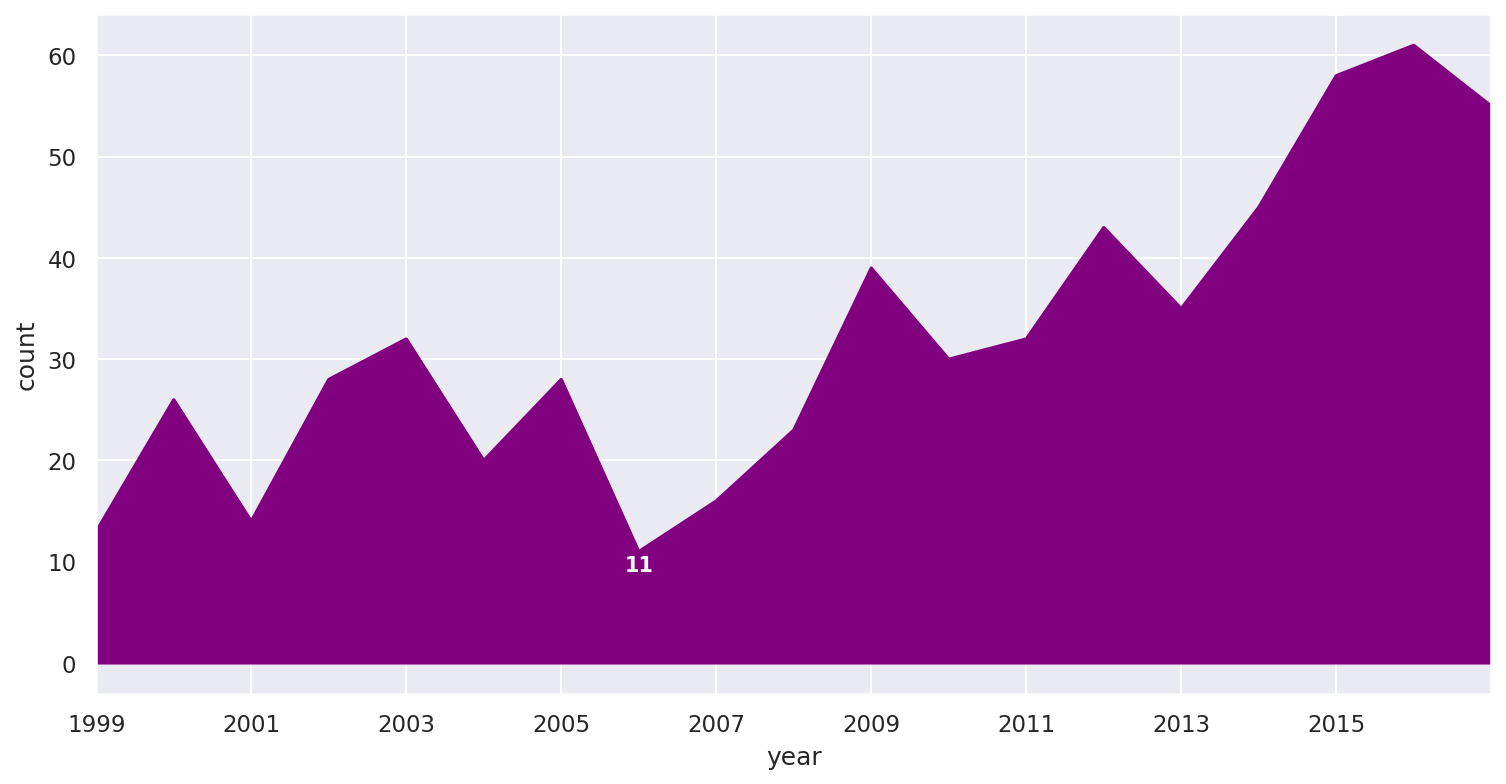

In [94]:
plt.figure(figsize = (12,6),dpi = 150)

sns.set(style = 'darkgrid')

plt.xticks(np.arange(data['year'].min(),
                     data['year'].max(),
                     2))
plt.xlim(data['year'].min(),
         data['year'].max())


sns.lineplot(data = data, x = 'year',y = 'count',color = 'purple')
plt.fill_between (data['year'], data['count'], color='purple')


plt.text(data['year'][data['count'] == data['count'].min()],
         data['count'][data['count'] == data['count'].min()] - 2,
        str(data['count'].min()), ha = 'center',color = 'white',size = 10,weight = 'heavy')



In [102]:
answ_2 = data[['year','count']][data['count'] == data['count'].min()]
answ_2


,year,count
7,2006,11
